## Generating Artificial Random Mobility Dataframes
## (Year-Person-Gender-Company)

### By Moses Boudourides

In [1]:
import pandas as pd
import numpy as np
import random
from random import shuffle
from collections import Counter
import itertools as it
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
def syntheticData(N,Y,persons,gender,companies):
    years=range(2019)[2019-Y:]
    Year=[]
    Person=[]
    Company=[]
    for y in years:
        for p in persons:
            Year.append(y)
            Person.append(p)
            Company.append(random.choice(companies))
    gend={}
    for i in persons:
        g=random.choice(gender)
        gend[i]=g
    Gender=[]
    for p in Person:
        g=gend[p]
        Gender.append(g)
    df=pd.DataFrame({
        'Year':Year,
        'Person':Person,
        'Gender':Gender,
        'Company':Company}, 
        columns=['Year','Person', 'Gender','Company'])
    return df

In [3]:
N=50 #500
Y=5  #20
years=range(2019)[2019-Y:]
persons=["pers_"+str(x) for x in range(N)]
gender=["male","female"]
# companies=["comp_"+x for x in map(chr, range(65, 91))] 
companies=[]
for x in map(chr, range(65, 70)): #91
    companies.append("comp_"+x)
#     for k in range(5):
#         companies.append("comp_"+x+str(k))
df=syntheticData(N,Y,persons,gender,companies)
df.sort_values("Year", inplace=True)
# df.head()
print len(df)
# df
df.iloc[::N, :] #500

250


,Year,Person,Gender,Company
0,2014,pers_0,female,comp_D
85,2015,pers_35,male,comp_B
135,2016,pers_35,male,comp_B
185,2017,pers_35,male,comp_B
234,2018,pers_34,female,comp_B


In [4]:
print "Number of years:",len(years),len(df.Year.unique())
ty=[]
for i in range(len(years))[1:]:
    ty.append(str(years[i-1])+"_"+str(years[i]))
m=len(ty)
print "Number of successive pairs of years",m
print "Successive pairs of years:"
print ty
print "Number of persons:",len(persons),len(df.Person.unique())
pmales=df.loc[df['Gender'] == 'male']
pfemales=df.loc[df['Gender'] == 'female']
print "Number of female persons:",len(pfemales.Person.unique())
print "Number of male persons:",len(pmales.Person.unique())
print "Number of companies:",len(companies),len(df.Company.unique())

Number of years: 5 5
Number of successive pairs of years 4
Successive pairs of years:
['2014_2015', '2015_2016', '2016_2017', '2017_2018']
Number of persons: 50 50
Number of female persons: 25
Number of male persons: 25
Number of companies: 5 5


In [5]:
co=[]
cm=[]
cf=[]
te=[]
for c in df.Company.unique():
    pdf=df.loc[df['Company'] == c]
    pp=pdf.Person.unique()
    ppf=len(pdf.loc[pdf['Gender']=='female'].Person.unique())
    ppm=len(pdf.loc[pdf['Gender']=='male'].Person.unique())
    cm.append(ppm)
    cf.append(ppf)
    te.append(len(pp))
    co.append(c)
cdf=pd.DataFrame({
    'Company':co, 
    'Number_of_Females':cf,
    'Number_of_Males':cm,
    'Total_Number_of_Employees':te},
    columns=['Company','Number_of_Females','Number_of_Males','Total_Number_of_Employees'])
cdf.sort_values("Company", inplace=True)
cdf

,Company,Number_of_Females,Number_of_Males,Total_Number_of_Employees
1,comp_A,18,17,35
2,comp_B,22,18,40
4,comp_C,18,15,33
0,comp_D,17,8,25
3,comp_E,9,18,27


In [6]:
ycdf={}
for y in years:
    co=[]
    cm=[]
    cf=[]
    te=[]
    ydf=df.loc[df['Year'] == y]
    for c in df.Company.unique():
        pdf=ydf.loc[ydf['Company'] == c]
        pp=pdf.Person.unique()
        ppf=len(pdf.loc[pdf['Gender']=='female'].Person.unique())
        ppm=len(pdf.loc[pdf['Gender']=='male'].Person.unique())
    #     print c,len(pp),ppf+ppm,ppf,ppm
        cm.append(ppm)
        cf.append(ppf)
        te.append(len(pp))
        co.append(c)
    cdf=pd.DataFrame({
        'Company':co, 
        'Number_of_Females':cf,
        'Number_of_Males':cm,
        'Total_Number_of_Employees':te},
        columns=['Company','Number_of_Females','Number_of_Males','Total_Number_of_Employees'])
    cdf.sort_values("Company", inplace=True)
    ycdf[y]=cdf
ycdf[2017]

,Company,Number_of_Females,Number_of_Males,Total_Number_of_Employees
1,comp_A,2,5,7
2,comp_B,11,4,15
4,comp_C,2,3,5
0,comp_D,7,1,8
3,comp_E,3,12,15


In [7]:
persons_companies_peryear={}
for p in df.Person.unique():
    td={}
    pdf=df.loc[df['Person'] == p]
    for y in years:
        if len(pdf.loc[pdf['Year'] == y].values[0])>0:
            td[y]=pdf.loc[pdf['Year'] == y].values[0][3]
        else:
            td[y]=None
    persons_companies_peryear[p]=(td,df.loc[df['Person']==p].Gender.values[0])
for k,v in persons_companies_peryear.items():
    print k,v

pers_22 ({2016: 'comp_E', 2017: 'comp_B', 2018: 'comp_E', 2014: 'comp_A', 2015: 'comp_B'}, 'female')
pers_40 ({2016: 'comp_C', 2017: 'comp_B', 2018: 'comp_E', 2014: 'comp_A', 2015: 'comp_D'}, 'female')
pers_41 ({2016: 'comp_B', 2017: 'comp_E', 2018: 'comp_A', 2014: 'comp_B', 2015: 'comp_C'}, 'male')
pers_18 ({2016: 'comp_B', 2017: 'comp_E', 2018: 'comp_B', 2014: 'comp_E', 2015: 'comp_B'}, 'male')
pers_24 ({2016: 'comp_C', 2017: 'comp_E', 2018: 'comp_A', 2014: 'comp_B', 2015: 'comp_A'}, 'male')
pers_39 ({2016: 'comp_B', 2017: 'comp_B', 2018: 'comp_C', 2014: 'comp_A', 2015: 'comp_C'}, 'female')
pers_38 ({2016: 'comp_B', 2017: 'comp_B', 2018: 'comp_A', 2014: 'comp_A', 2015: 'comp_C'}, 'female')
pers_25 ({2016: 'comp_E', 2017: 'comp_E', 2018: 'comp_E', 2014: 'comp_A', 2015: 'comp_C'}, 'male')
pers_19 ({2016: 'comp_A', 2017: 'comp_E', 2018: 'comp_A', 2014: 'comp_A', 2015: 'comp_E'}, 'male')
pers_16 ({2016: 'comp_A', 2017: 'comp_C', 2018: 'comp_B', 2014: 'comp_D', 2015: 'comp_D'}, 'female')


In [8]:
companies_persons_female_peryear={}
for c in df.Company.unique():
    td={}
    pdf=df.loc[df['Company'] == c]
    for y in years:
        tp=[]
        if len(pdf.loc[pdf['Year'] == y].values)>0: #[0]
            pp=pdf.loc[pdf['Year'] == y].values[0][1]
            if pdf.loc[pdf['Person']==pp].Gender.values[0]=="female":
                for ppp in pdf.loc[pdf['Gender']=='female'].Person.unique():
                    if ppp not in tp:
                        tp.append(ppp)
        else:
            tp=[]
        td[y]=tp      
    companies_persons_female_peryear[c]=td
# for k,v in companies_persons_female_peryear.items():
#     print k,v
companies_persons_female_peryear['comp_D']

{2014: ['pers_0',
  'pers_34',
  'pers_43',
  'pers_48',
  'pers_16',
  'pers_20',
  'pers_12',
  'pers_40',
  'pers_8',
  'pers_10',
  'pers_47',
  'pers_6',
  'pers_17',
  'pers_27',
  'pers_45',
  'pers_23',
  'pers_1'],
 2015: ['pers_0',
  'pers_34',
  'pers_43',
  'pers_48',
  'pers_16',
  'pers_20',
  'pers_12',
  'pers_40',
  'pers_8',
  'pers_10',
  'pers_47',
  'pers_6',
  'pers_17',
  'pers_27',
  'pers_45',
  'pers_23',
  'pers_1'],
 2016: ['pers_0',
  'pers_34',
  'pers_43',
  'pers_48',
  'pers_16',
  'pers_20',
  'pers_12',
  'pers_40',
  'pers_8',
  'pers_10',
  'pers_47',
  'pers_6',
  'pers_17',
  'pers_27',
  'pers_45',
  'pers_23',
  'pers_1'],
 2017: ['pers_0',
  'pers_34',
  'pers_43',
  'pers_48',
  'pers_16',
  'pers_20',
  'pers_12',
  'pers_40',
  'pers_8',
  'pers_10',
  'pers_47',
  'pers_6',
  'pers_17',
  'pers_27',
  'pers_45',
  'pers_23',
  'pers_1'],
 2018: ['pers_0',
  'pers_34',
  'pers_43',
  'pers_48',
  'pers_16',
  'pers_20',
  'pers_12',
  'pers_

In [9]:
companies_persons_male_peryear={}
for c in df.Company.unique():
    td={}
    pdf=df.loc[df['Company'] == c]
    for y in years:
        tp=[]
        if len(pdf.loc[pdf['Year'] == y].values)>0: #[0]
            pp=pdf.loc[pdf['Year'] == y].values[0][1]
            if pdf.loc[pdf['Person']==pp].Gender.values[0]=="male":
                for ppp in pdf.loc[pdf['Gender']=='male'].Person.unique():
                    if ppp not in tp:
                        tp.append(ppp)
        else:
            tp=[]
        td[y]=tp      
    companies_persons_male_peryear[c]=td
# for k,v in companies_persons_male_peryear.items():
#     print k,v
companies_persons_male_peryear['comp_D']

{2014: [], 2015: [], 2016: [], 2017: [], 2018: []}

In [10]:
flows={}
for y in ty:
    t=[]
    y0=int(y.split("_")[0])
    y1=int(y.split("_")[1])
    for k,v in persons_companies_peryear.items():
        for kk,vv in v[0].items():
            ps=[]
            if kk==y0:
                source=vv
        for kk,vv in v[0].items():
            if kk==y1:
#                 if vv!=source:
                target=vv
                t.append((source,target,k))
    flows[y]=t
print len(flows),len(ty)
flows

4 4


{'2014_2015': [('comp_A', 'comp_B', 'pers_22'),
  ('comp_A', 'comp_D', 'pers_40'),
  ('comp_B', 'comp_C', 'pers_41'),
  ('comp_E', 'comp_B', 'pers_18'),
  ('comp_B', 'comp_A', 'pers_24'),
  ('comp_A', 'comp_C', 'pers_39'),
  ('comp_A', 'comp_C', 'pers_38'),
  ('comp_A', 'comp_C', 'pers_25'),
  ('comp_A', 'comp_E', 'pers_19'),
  ('comp_D', 'comp_D', 'pers_16'),
  ('comp_A', 'comp_B', 'pers_31'),
  ('comp_A', 'comp_C', 'pers_30'),
  ('comp_A', 'comp_A', 'pers_33'),
  ('comp_E', 'comp_B', 'pers_32'),
  ('comp_C', 'comp_B', 'pers_35'),
  ('comp_D', 'comp_A', 'pers_34'),
  ('comp_A', 'comp_E', 'pers_37'),
  ('comp_B', 'comp_C', 'pers_36'),
  ('comp_B', 'comp_C', 'pers_17'),
  ('comp_A', 'comp_C', 'pers_14'),
  ('comp_D', 'comp_A', 'pers_20'),
  ('comp_C', 'comp_C', 'pers_13'),
  ('comp_C', 'comp_E', 'pers_21'),
  ('comp_D', 'comp_C', 'pers_12'),
  ('comp_A', 'comp_B', 'pers_11'),
  ('comp_C', 'comp_D', 'pers_9'),
  ('comp_B', 'comp_A', 'pers_23'),
  ('comp_C', 'comp_A', 'pers_7'),
  ('comp_

In [11]:
for k,v in flows.items():
    if k=="2017_2018":
        t=[]
        for vv in v:
            pdf=df.loc[df['Person'] == vv[2]]
            if pdf.Gender.values[0]=="female":
#             if pdf.Gender.values[0]=="male":
                t.append((vv[0],vv[1]))
        ct=Counter(t)
        for i,j in ct.items():
            if i[0]!=i[1]:
#             if i[0]=="comp_D" or i[1]=="comp_D":
                print i,j
#         if j>1:
#             print i

('comp_A', 'comp_B') 1
('comp_B', 'comp_A') 3
('comp_C', 'comp_A') 1
('comp_B', 'comp_C') 3
('comp_D', 'comp_C') 3
('comp_C', 'comp_B') 1
('comp_A', 'comp_D') 1
('comp_D', 'comp_B') 2
('comp_D', 'comp_A') 1
('comp_B', 'comp_E') 4
('comp_E', 'comp_B') 2
('comp_E', 'comp_C') 1


In [12]:
for k,v in flows.items():
    if k=="2017_2018":
        t=[]
        for vv in v:
            pdf=df.loc[df['Person'] == vv[2]]
#             if pdf.Gender.values[0]=="female":
            if pdf.Gender.values[0]=="male":
                t.append((vv[0],vv[1]))
        ct=Counter(t)
        for i,j in ct.items():
            if i[0]!=i[1]:
#             if i[0]=="comp_D" or i[1]=="comp_D":
                print i,j
#         if j>1:
#             print i

('comp_A', 'comp_B') 1
('comp_E', 'comp_D') 1
('comp_A', 'comp_C') 2
('comp_B', 'comp_C') 2
('comp_C', 'comp_D') 1
('comp_C', 'comp_B') 2
('comp_D', 'comp_A') 1
('comp_A', 'comp_E') 1
('comp_E', 'comp_A') 4
('comp_E', 'comp_B') 3
('comp_E', 'comp_C') 1


In [13]:
TGf={}
for y in ty:
    eds=[]
    for k,v in flows.items():
        if k==y:
            for vv in v:
                pdf=df.loc[df['Person'] == vv[2]]
                if pdf.Gender.values[0]=="female":
                    eds.append((vv[0],vv[1]))
    G = nx.MultiDiGraph()
    G.add_edges_from(eds)
    weight=[(x, z, {'weight': v}) for (x, z), v in Counter(G.edges()).items()]
    G = nx.DiGraph(weight)
    TGf[y]=G

In [14]:
dd={}
for y in ty:
    y0=int(y.split("_")[0])
    d={}
    yycdf=ycdf[y0]
    for c in companies:
        d[c]=yycdf.loc[yycdf['Company']==c]['Number_of_Females'].values[0]
    dd[y]=d
# dd
for y in ty:
    G=TGf[y]
    for k,v in dd[y].items():
        G.add_edge(k,k,weight=v)
    TGf[y]=G

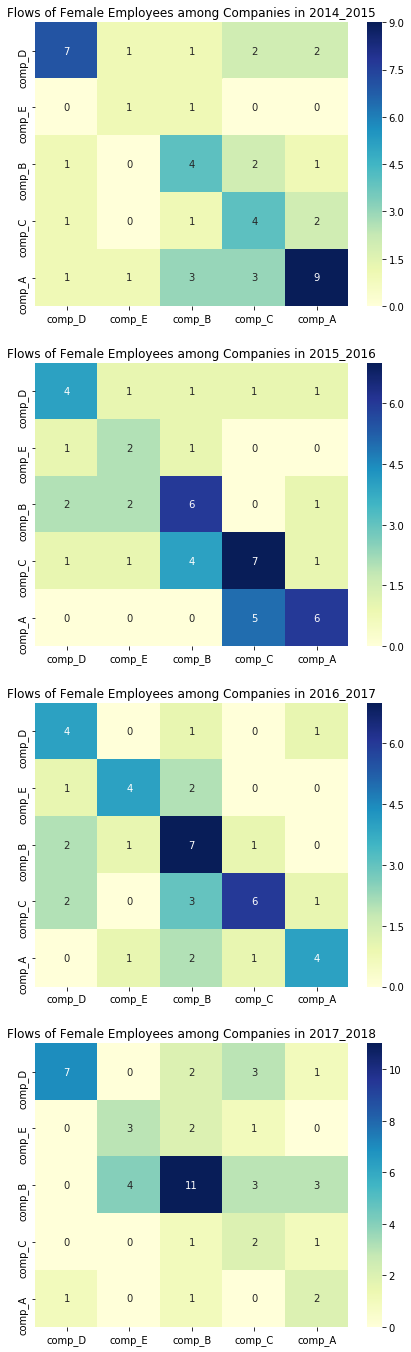

In [15]:
fig = plt.figure(figsize=(7,6*m))
for i in range(m):
    ax = fig.add_subplot(m,1,i+1)
    gocomp=list(TGf[ty[i]].nodes())
    ATGf={}
    for k,v in TGf.items():
        ATGf[k]=nx.adjacency_matrix(v)
    A=ATGf[ty[i]].todense()
#     plt.figure(figsize=(7,5)) #12, 10))
#     ax = plt.axes()
    st="Flows of Female Employees among Companies in %s"%ty[i]
    ax.set_title(st)
    xticklabels=gocomp #companies
    yticklabels=gocomp #companies
    sns.heatmap(A,annot=True, xticklabels=xticklabels,yticklabels=yticklabels,fmt="d", cmap='YlGnBu');

In [16]:
TGm={}
for y in ty:
    eds=[]
    for k,v in flows.items():
        if k==y:
            for vv in v:
                pdf=df.loc[df['Person'] == vv[2]]
                if pdf.Gender.values[0]=="male":
                    eds.append((vv[0],vv[1]))
    G = nx.MultiDiGraph()
    G.add_edges_from(eds)
    weight=[(x, z, {'weight': v}) for (x, z), v in Counter(G.edges()).items()]
    G = nx.DiGraph(weight)
    TGm[y]=G

In [17]:
dd={}
for y in ty:
    y0=int(y.split("_")[0])
    d={}
    yycdf=ycdf[y0]
    for c in companies:
        d[c]=yycdf.loc[yycdf['Company']==c]['Number_of_Males'].values[0]
    dd[y]=d
# dd
for y in ty:
    G=TGm[y]
    for k,v in dd[y].items():
        G.add_edge(k,k,weight=v)
    TGm[y]=G

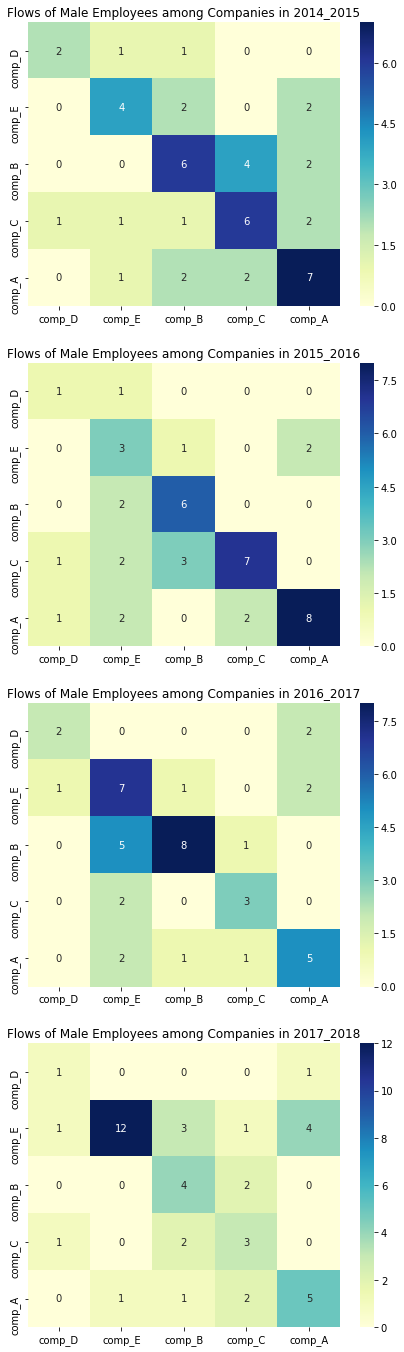

In [18]:
fig = plt.figure(figsize=(7,6*m))
for i in range(m):
    ax = fig.add_subplot(m,1,i+1)
    gocomp=list(TGm[ty[i]].nodes())
    ATGm={}
    for k,v in TGm.items():
        ATGm[k]=nx.adjacency_matrix(v)
    A=ATGm[ty[i]].todense()
#     plt.figure(figsize=(7,5)) #12, 10))
#     ax = plt.axes()
    st="Flows of Male Employees among Companies in %s"%ty[i]
    ax.set_title(st)
    xticklabels=gocomp #companies
    yticklabels=gocomp #companies
    sns.heatmap(A,annot=True, xticklabels=xticklabels,yticklabels=yticklabels,fmt="d", cmap='YlGnBu');